In [114]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

#Extracted data from amazon_transactions with address as San Fransisco using Filter in excel and uploading 

In [115]:
 
from google.colab import files 
uploaded = files.upload()
dataset=pd.read_csv('orders.csv')

Saving orders.csv to orders.csv


#dataset Information

In [116]:

dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44732 entries, 0 to 44731
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          44732 non-null  int64  
 1   Product           44732 non-null  object 
 2   Quantity_Ordered  44732 non-null  int64  
 3   Price_Each        44732 non-null  float64
 4   Order_Date        44732 non-null  object 
 5   Purchase_Address  44732 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.0+ MB


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176562,USB-C Charging Cable,1,11.95,4/29/2019 13:03,"381 Wilson St, San Francisco, CA 94016"
1,176565,Macbook Pro Laptop,1,1700.00,4/24/2019 10:38,"915 Willow St, San Francisco, CA 94016"
2,176573,USB-C Charging Cable,1,11.95,4/27/2019 18:41,"214 Chestnut St, San Francisco, CA 94016"
3,176584,Flatscreen TV,1,300.00,4/24/2019 20:39,"936 Church St, San Francisco, CA 94016"
4,176586,AAA Batteries (4-pack),2,2.99,4/10/2019 17:00,"365 Center St, San Francisco, CA 94016"
5,176586,Google Phone,1,600.00,4/10/2019 17:00,"365 Center St, San Francisco, CA 94016"
6,176594,Wired Headphones,1,11.99,4/17/2019 23:04,"63 Maple St, San Francisco, CA 94016"
7,176597,USB-C Charging Cable,1,11.95,4/19/2019 13:39,"681 11th St, San Francisco, CA 94016"
8,176598,AAA Batteries (4-pack),2,2.99,4/21/2019 20:33,"294 Park St, San Francisco, CA 94016"
9,176603,USB-C Charging Cable,1,11.95,4/1/2019 7:46,"858 6th St, San Francisco, CA 94016"


#cleaning dataset

In [117]:

dataset.dropna() 
dataset.head(8)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176562,USB-C Charging Cable,1,11.95,4/29/2019 13:03,"381 Wilson St, San Francisco, CA 94016"
1,176565,Macbook Pro Laptop,1,1700.00,4/24/2019 10:38,"915 Willow St, San Francisco, CA 94016"
2,176573,USB-C Charging Cable,1,11.95,4/27/2019 18:41,"214 Chestnut St, San Francisco, CA 94016"
3,176584,Flatscreen TV,1,300.00,4/24/2019 20:39,"936 Church St, San Francisco, CA 94016"
4,176586,AAA Batteries (4-pack),2,2.99,4/10/2019 17:00,"365 Center St, San Francisco, CA 94016"
5,176586,Google Phone,1,600.00,4/10/2019 17:00,"365 Center St, San Francisco, CA 94016"
6,176594,Wired Headphones,1,11.99,4/17/2019 23:04,"63 Maple St, San Francisco, CA 94016"
7,176597,USB-C Charging Cable,1,11.95,4/19/2019 13:39,"681 11th St, San Francisco, CA 94016"


#Visualizing most-lease purchased product and frequency of others

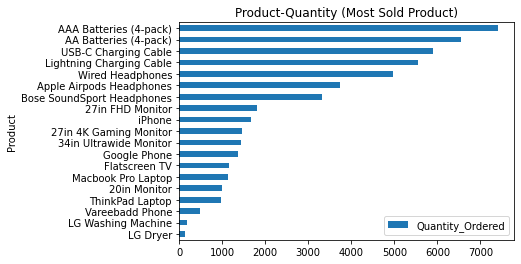

In [118]:

df=dataset.groupby(['Product'])[['Quantity_Ordered']].sum()
df.sort_values(by='Quantity_Ordered',inplace=True, ascending=True)
df.plot(kind="barh",title="Product-Quantity (Most Sold Product)")

#Plotting Sales per Product (The number in sales is in order 10^5 for which graph is converted accordingly)

,Price_Each
Product,
AAA Batteries (4-pack),14746.68
AA Batteries (4-pack),18827.52
Wired Headphones,55058.08
USB-C Charging Cable,64147.60
Lightning Charging Cable,77351.30


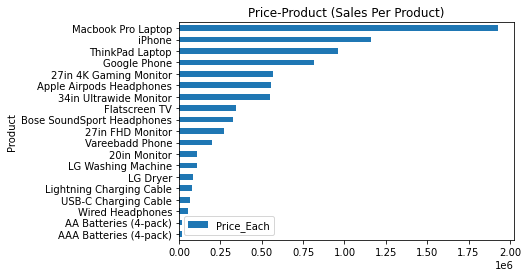

In [119]:

af=dataset.groupby(['Product'])[['Price_Each']].sum()
af.sort_values(by='Price_Each',inplace=True, ascending=True)

af.plot(kind="barh",title="Price-Product (Sales Per Product)")

af.head(5)

#Taking only the IDs which have more than 1 occurances

In [120]:

dfa=dataset
counts = dfa['Order_ID'].value_counts()
a=dfa[dfa['Order_ID'].isin(counts.index[counts > 1])]
a

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
4,176586,AAA Batteries (4-pack),2,2.99,4/10/2019 17:00,"365 Center St, San Francisco, CA 94016"
5,176586,Google Phone,1,600.00,4/10/2019 17:00,"365 Center St, San Francisco, CA 94016"
67,176808,Google Phone,1,600.00,4/28/2019 18:03,"933 Meadow St, San Francisco, CA 94016"
68,176808,Wired Headphones,1,11.99,4/28/2019 18:03,"933 Meadow St, San Francisco, CA 94016"
108,176975,USB-C Charging Cable,1,11.95,4/23/2019 15:46,"28 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
44657,259035,27in FHD Monitor,1,149.99,9/29/2019 13:52,"327 Lake St, San Francisco, CA 94016"
44708,259270,Google Phone,1,600.00,9/6/2019 15:27,"940 10th St, San Francisco, CA 94016"
44709,259270,USB-C Charging Cable,1,11.95,9/6/2019 15:27,"940 10th St, San Francisco, CA 94016"
44725,259350,Google Phone,1,600.00,9/30/2019 13:49,"519 Maple St, San Francisco, CA 94016"


In [121]:
a.info()
type(a)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3562 entries, 4 to 44726
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          3562 non-null   int64  
 1   Product           3562 non-null   object 
 2   Quantity_Ordered  3562 non-null   int64  
 3   Price_Each        3562 non-null   float64
 4   Order_Date        3562 non-null   object 
 5   Purchase_Address  3562 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 194.8+ KB


pandas.core.frame.DataFrame

#Sorting out the most frequent Product combinations based on 'Ordered_ID'

In [122]:

dfz=a.groupby('Order_ID').agg(lambda x: x.tolist())
dfz

,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
Order_ID,,,,,
141450,"[Google Phone, Bose SoundSport Headphones]","[1, 1]","[600.0, 99.99]","[1/12/2019 11:16, 1/12/2019 11:16]","[521 Park St, San Francisco, CA 94016, 521 Par..."
141782,"[27in FHD Monitor, Bose SoundSport Headphones]","[1, 1]","[149.99, 99.99]","[1/11/2019 21:13, 1/11/2019 21:13]","[353 4th St, San Francisco, CA 94016, 353 4th ..."
141795,"[iPhone, Wired Headphones]","[1, 1]","[700.0, 11.99]","[1/19/2019 20:31, 1/19/2019 20:31]","[383 Jefferson St, San Francisco, CA 94016, 38..."
141843,"[AA Batteries (4-pack), AAA Batteries (4-pack)]","[1, 1]","[3.84, 2.99]","[1/10/2019 9:59, 1/10/2019 9:59]","[400 9th St, San Francisco, CA 94016, 400 9th ..."
141946,"[USB-C Charging Cable, Wired Headphones]","[1, 1]","[11.95, 11.99]","[1/11/2019 17:24, 1/11/2019 17:24]","[731 Lake St, San Francisco, CA 94016, 731 Lak..."
...,...,...,...,...,...
318794,"[Bose SoundSport Headphones, AA Batteries (4-p...","[1, 1]","[99.99, 3.84]","[12/13/2019 9:46, 12/13/2019 9:46]","[146 12th St, San Francisco, CA 94016, 146 12t..."
318902,"[Google Phone, Wired Headphones]","[1, 1]","[600.0, 11.99]","[12/14/2019 12:16, 12/14/2019 12:16]","[837 5th St, San Francisco, CA 94016, 837 5th ..."
319045,"[Flatscreen TV, AAA Batteries (4-pack)]","[1, 1]","[300.0, 2.99]","[12/22/2019 21:52, 12/22/2019 21:52]","[317 Park St, San Francisco, CA 94016, 317 Par..."


In [123]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 141450 to 319447
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product           1728 non-null   object
 1   Quantity_Ordered  1728 non-null   object
 2   Price_Each        1728 non-null   object
 3   Order_Date        1728 non-null   object
 4   Purchase_Address  1728 non-null   object
dtypes: object(5)
memory usage: 81.0+ KB


#Extracting out Product Column

In [124]:

dm=dfz['Product']
dm

Order_ID
141450           [Google Phone, Bose SoundSport Headphones]
141782       [27in FHD Monitor, Bose SoundSport Headphones]
141795                           [iPhone, Wired Headphones]
141843      [AA Batteries (4-pack), AAA Batteries (4-pack)]
141946             [USB-C Charging Cable, Wired Headphones]
                                ...                        
318794    [Bose SoundSport Headphones, AA Batteries (4-p...
318902                     [Google Phone, Wired Headphones]
319045              [Flatscreen TV, AAA Batteries (4-pack)]
319337              [Vareebadd Phone, USB-C Charging Cable]
319447                     [Google Phone, Wired Headphones]
Name: Product, Length: 1728, dtype: object

#Total No. of Combinations of Products (after conversion to List)

In [125]:

Prod = dfz['Product'].tolist()
Prod
len(Prod)

1728

#unique Combinations

In [126]:

product = [list(x) for x in set(tuple(x) for x in Prod)]
len(product)

249

#Description Of Combinations

In [127]:

product

[['iPhone', 'USB-C Charging Cable'],
 ['20in Monitor', 'Lightning Charging Cable'],
 ['Flatscreen TV', 'iPhone'],
 ['Wired Headphones', 'Apple Airpods Headphones'],
 ['USB-C Charging Cable', 'AA Batteries (4-pack)'],
 ['Wired Headphones', 'Macbook Pro Laptop'],
 ['34in Ultrawide Monitor', 'Lightning Charging Cable'],
 ['34in Ultrawide Monitor', '20in Monitor'],
 ['LG Dryer', 'AA Batteries (4-pack)'],
 ['Flatscreen TV', 'AAA Batteries (4-pack)'],
 ['Apple Airpods Headphones', 'Flatscreen TV'],
 ['iPhone', 'Wired Headphones', 'Lightning Charging Cable'],
 ['Vareebadd Phone', '34in Ultrawide Monitor'],
 ['Bose SoundSport Headphones', 'Bose SoundSport Headphones'],
 ['Lightning Charging Cable', '27in 4K Gaming Monitor'],
 ['Bose SoundSport Headphones', 'Flatscreen TV'],
 ['Google Phone',
  'USB-C Charging Cable',
  'Wired Headphones',
  'USB-C Charging Cable'],
 ['Google Phone', 'iPhone'],
 ['27in 4K Gaming Monitor', 'AAA Batteries (4-pack)'],
 ['AA Batteries (4-pack)', 'Vareebadd Phone'],

#Converting Prod List to Dictionary and Sorting in Descending order 

In [129]:
Output = {} 
  
for lis in Prod: 
    Output.setdefault(tuple(lis), list()).append(1) 
for a, b in Output.items(): 
    Output[a] = sum(b) 

Output={k: v for k, v in sorted(Output.items(), key=lambda item: item[1],reverse=True)}   
print("Total Number Of Combination:",len(Output))

print(Output)

Total Number Of Combination: 249
{('iPhone', 'Lightning Charging Cable'): 213, ('Google Phone', 'USB-C Charging Cable'): 211, ('iPhone', 'Wired Headphones'): 83, ('iPhone', 'Apple Airpods Headphones'): 73, ('Vareebadd Phone', 'USB-C Charging Cable'): 72, ('Google Phone', 'Wired Headphones'): 64, ('Google Phone', 'Bose SoundSport Headphones'): 40, ('Vareebadd Phone', 'Wired Headphones'): 25, ('iPhone', 'Lightning Charging Cable', 'Wired Headphones'): 20, ('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'): 18, ('Lightning Charging Cable', 'Lightning Charging Cable'): 17, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 17, ('AA Batteries (4-pack)', 'Wired Headphones'): 15, ('AA Batteries (4-pack)', 'Lightning Charging Cable'): 15, ('AA Batteries (4-pack)', 'USB-C Charging Cable'): 14, ('Lightning Charging Cable', 'Bose SoundSport Headphones'): 13, ('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'): 13, ('AAA Batteries (4-pack)', 'USB-C Charging Cable'): 13, ('Wir

#Let's Try the Recommendation

In [134]:
uin = input("Enter Product:")

ke=uin
for i in Output.keys():
    if uin in str(i):
        res = [val for key, val in Output.items() if ke in key]
        #print(res)
        recm=max(res)
        #print(recm)
        for item in Output: 
          if Output[item]==recm:
            recm=item
         
print("Recommended Items:",item)

Enter Product:iPhone
Recommended Items: ('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones')


In [135]:
uin = input("Enter Product:")

ke=uin
for i in Output.keys():
    if uin in str(i):
        res = [val for key, val in Output.items() if ke in key]
        #print(res)
        recm=max(res)
        #print(recm)
        for item in Output: 
          if Output[item]==recm:
            recm=item
         
print("Recommended Items:",recm)

Enter Product:Google Phone
Recommended Items: ('Google Phone', 'USB-C Charging Cable')


#Hence, we conclude the most suitable list of items for certain Products.**bold text**